<a href="https://colab.research.google.com/github/Vivek-ML001/Zomato_Food_Rating/blob/main/Zomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [21]:
df = pd.read_csv('/content/zomato.csv', encoding='latin1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [22]:
df.shape

(9551, 21)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [24]:
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [25]:
df.duplicated().sum()

np.int64(0)

In [26]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [27]:
# Handle missing values by dropping rows where 'Cuisines' is not present
df.dropna(subset=['Cuisines'], inplace=True)

In [28]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [29]:
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,0


In [30]:
# Simplify the 'Cuisines' column by taking only the first cuisine listed
df['Cuisines'] = df['Cuisines'].apply(lambda x: x.split(',')[0])

In [31]:
# Convert 'Yes'/'No' columns to 1s and 0s for the model
df['Has Table booking'] = df['Has Table booking'].replace({'Yes': 1, 'No': 0})
df['Has Online delivery'] = df['Has Online delivery'].replace({'Yes': 1, 'No': 0})

/tmp/ipython-input-2105484358.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Has Table booking'] = df['Has Table booking'].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-2105484358.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Has Online delivery'] = df['Has Online delivery'].replace({'Yes': 1, 'No': 0})


In [32]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,French,...,Botswana Pula(P),1,0,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),1,0,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,Seafood,...,Botswana Pula(P),1,0,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,Japanese,...,Botswana Pula(P),0,0,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,Japanese,...,Botswana Pula(P),1,0,No,No,4,4.8,Dark Green,Excellent,229


In [33]:
# Use one-hot encoding to convert the 'Cuisines' column into a numerical format
cuisines_dummies = pd.get_dummies(df['Cuisines'], prefix='Cuisine')
df = pd.concat([df, cuisines_dummies], axis=1)

In [34]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Cuisine_Tapas,Cuisine_Tea,Cuisine_Tex-Mex,Cuisine_Thai,Cuisine_Tibetan,Cuisine_Turkish,Cuisine_Turkish Pizza,Cuisine_Vietnamese,Cuisine_Western,Cuisine_World Cuisine
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,French,...,False,False,False,False,False,False,False,False,False,False
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,False,False,False,False,False,False,False,False,False,False
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,Seafood,...,False,False,False,False,False,False,False,False,False,False
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,Japanese,...,False,False,False,False,False,False,False,False,False,False
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,Japanese,...,False,False,False,False,False,False,False,False,False,False


# Distribution of Restaurant Ratings

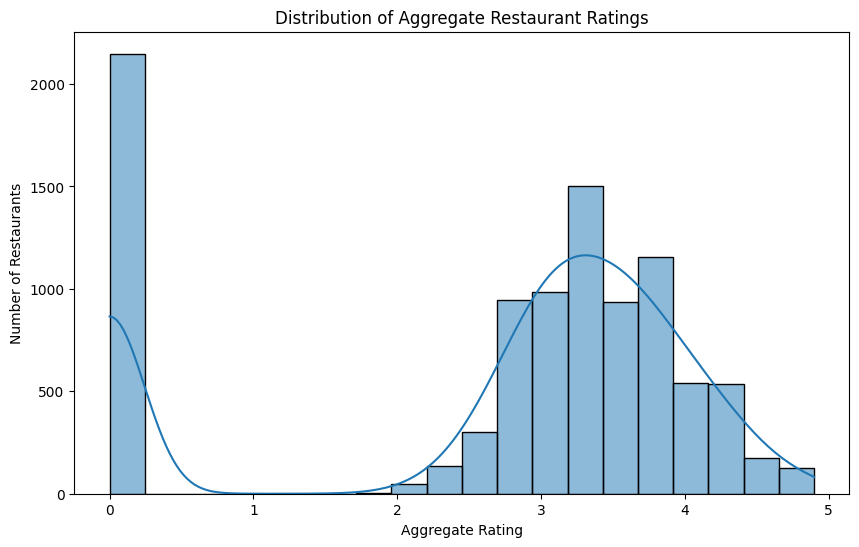

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Aggregate rating'], kde=True, bins=20)
plt.title('Distribution of Aggregate Restaurant Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.show()

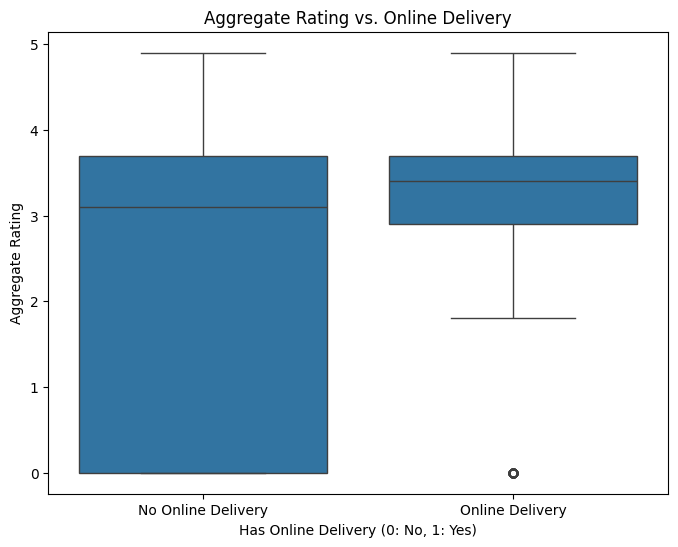

In [38]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Has Online delivery', y='Aggregate rating', data=df)
plt.title('Aggregate Rating vs. Online Delivery')
plt.xlabel('Has Online Delivery (0: No, 1: Yes)')
plt.ylabel('Aggregate Rating')
plt.xticks([0, 1], ['No Online Delivery', 'Online Delivery'])
plt.show()

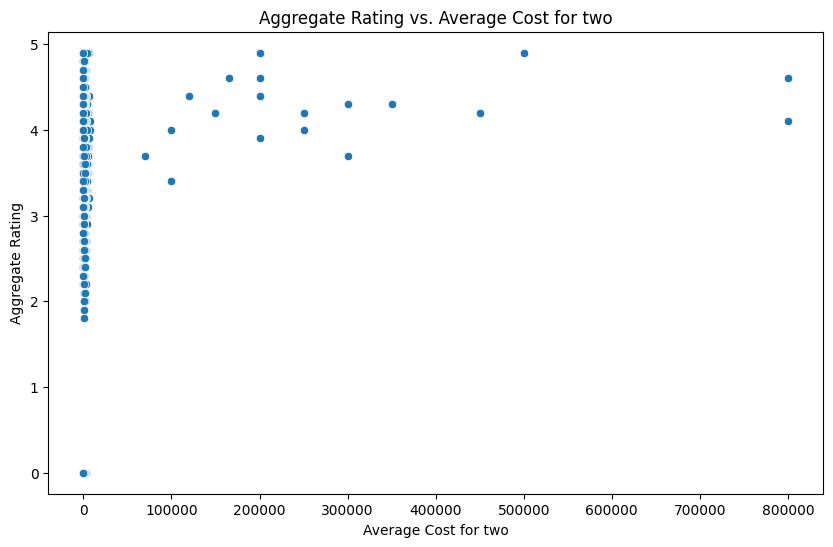

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average Cost for two', y='Aggregate rating', data=df)
plt.title('Aggregate Rating vs. Average Cost for two')
plt.xlabel('Average Cost for two')
plt.ylabel('Aggregate Rating')
plt.show()

In [40]:
# Get the value counts of the 'Cuisines' column
cuisine_counts = df['Cuisines'].value_counts()

# Display the top 10 most popular cuisines
print("Top 10 Most Popular Cuisines:")
display(cuisine_counts.head(10))

Top 10 Most Popular Cuisines:


,count
Cuisines,
North Indian,2992
Chinese,855
Fast Food,672
Bakery,621
Cafe,617
American,278
South Indian,262
Mithai,246
Street Food,236


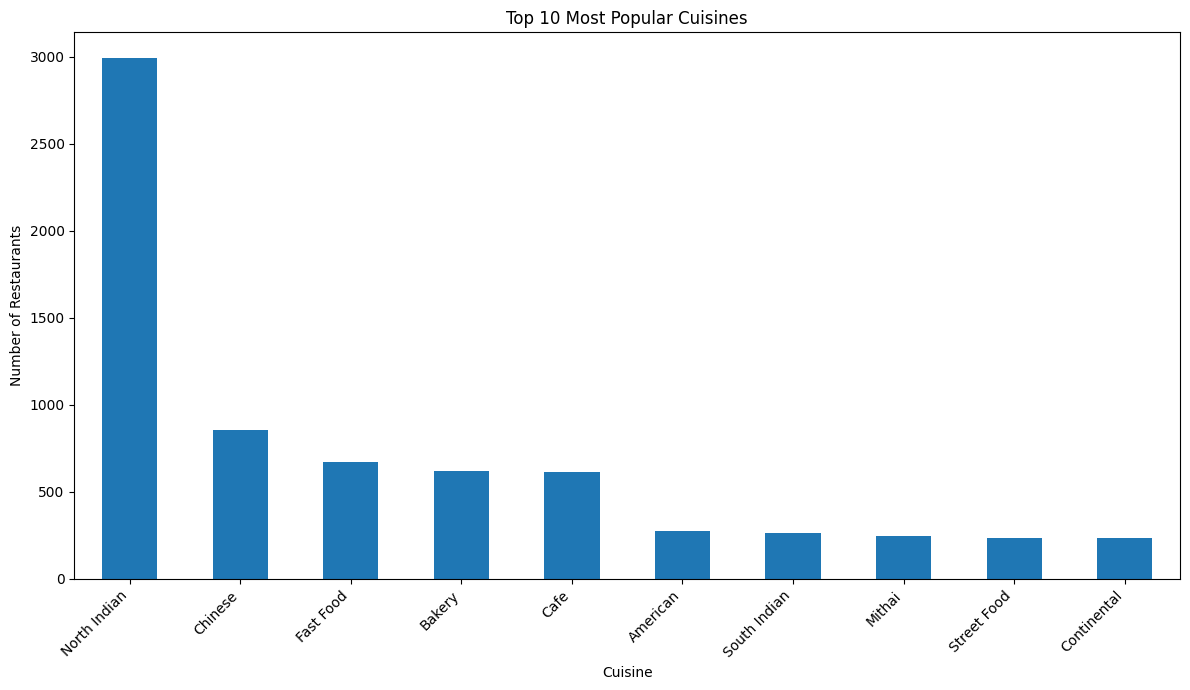

In [41]:
plt.figure(figsize=(12, 7))
cuisine_counts.head(10).plot(kind='bar')
plt.title('Top 10 Most Popular Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [42]:
rating_category_counts = df['Rating text'].value_counts()
print("Number of Restaurants in Each Rating Category:")
display(rating_category_counts)

Number of Restaurants in Each Rating Category:


,count
Rating text,
Average,3734
Not rated,2148
Good,2096
Very Good,1078
Excellent,300
Poor,186


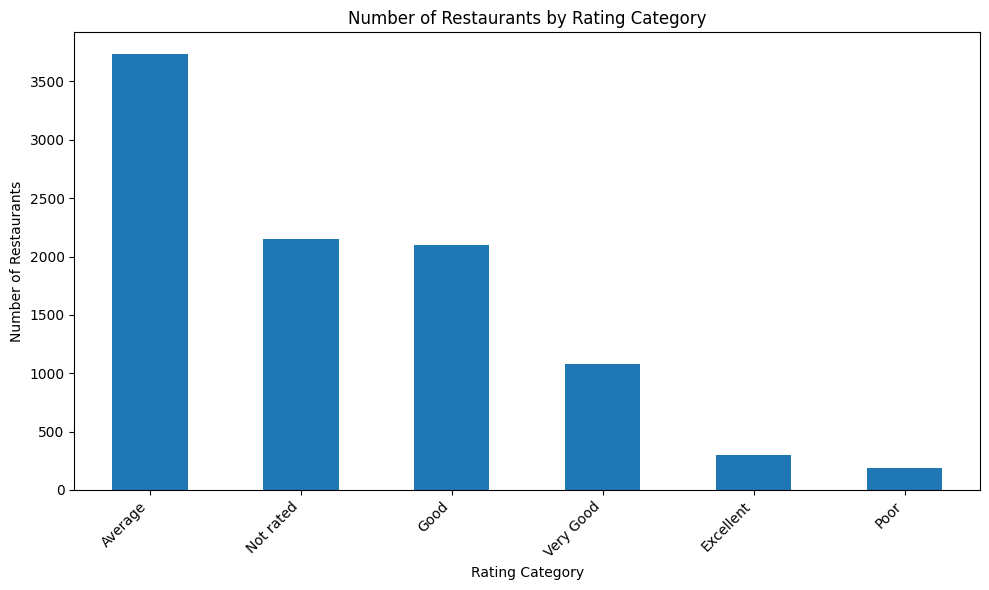

In [43]:
plt.figure(figsize=(10, 6))
rating_category_counts.plot(kind='bar')
plt.title('Number of Restaurants by Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [44]:
not_rated_restaurants = df[df['Rating text'] == 'Not rated']
display(not_rated_restaurants.head())
print(f"\nNumber of restaurants in 'Not rated' category: {len(not_rated_restaurants)}")

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Cuisine_Tapas,Cuisine_Tea,Cuisine_Tex-Mex,Cuisine_Thai,Cuisine_Tibetan,Cuisine_Turkish,Cuisine_Turkish Pizza,Cuisine_Vietnamese,Cuisine_Western,Cuisine_World Cuisine
30,6600060,Sandubas Cafí©,30,Brasí_lia,"Edifí_cio Josí© Severo, SCS 6, Bloco A, Loja 9...",Asa Sul,"Asa Sul, Brasí_lia",-47.890167,-15.797000,Brazilian,...,False,False,False,False,False,False,False,False,False,False
58,7305048,Quiosque Chopp Brahma,30,Rio de Janeiro,"Madureira Shopping - Loja 289/290, Piso 2, Est...",Madureira,"Madureira, Rio de Janeiro",-43.341164,-22.870413,Bar Food,...,False,False,False,False,False,False,False,False,False,False
69,6710645,Cantinho da Gula,30,Sí£o Paulo,"Rua Pedroso Alvarenga, 522, Itaim Bibi, Sí£o P...",Itaim Bibi,"Itaim Bibi, Sí£o Paulo",-46.675667,-23.581000,Brazilian,...,False,False,False,False,False,False,False,False,False,False
77,6701419,Divino Fogí£o,30,Sí£o Paulo,"Shopping MetríÇ Santa Cruz - Piso L2, Rua Domi...","Shopping MetríÇ Santa Cruz, Vila Mariana","Shopping MetríÇ Santa Cruz, Vila Mariana, Sí£o...",-46.637167,-23.599500,Brazilian,...,False,False,False,False,False,False,False,False,False,False
78,6703956,Super Grill,30,Sí£o Paulo,"Shopping Morumbi - Piso Lazer, Avenida Roque P...","Shopping Morumbi, Santo Amaro","Shopping Morumbi, Santo Amaro, Sí£o Paulo",-46.698574,-23.622925,Brazilian,...,False,False,False,False,False,False,False,False,False,False



Number of restaurants in 'Not rated' category: 2148


In [45]:
df.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Cuisine_Tapas,Cuisine_Tea,Cuisine_Tex-Mex,Cuisine_Thai,Cuisine_Tibetan,Cuisine_Turkish,Cuisine_Turkish Pizza,Cuisine_Vietnamese,Cuisine_Western,Cuisine_World Cuisine
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,False,False,False,False,False,True,False,False,False,False
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,World Cuisine,...,False,False,False,False,False,False,False,False,False,True
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,Italian,...,False,False,False,False,False,False,False,False,False,False
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,False,False,False,False,False,False,False,False,False,False
9550,5927402,Walter's Coffee Roastery,208,ÛÁstanbul,"CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...",Moda,"Moda, ÛÁstanbul",29.026016,40.984776,Cafe,...,False,False,False,False,False,False,False,False,False,False


# . Defining Features (Inputs) and Target (Output)

In [46]:
# Define the features (inputs) and the target (output) for the model
features = ['Average Cost for two', 'Votes', 'Price range', 'Has Table booking', 'Has Online delivery'] + list(cuisines_dummies.columns)
target = 'Aggregate rating'

In [47]:
X = df[features]
y = df[target]

In [48]:
# Split the data into a training set (80%) and a testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train and Evaluate the Model ---

In [49]:
# Initialize the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

In [50]:
# Train the model on the training data
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [51]:
# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)

# # Calculate the model's performance metrics

In [61]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [53]:
# Get the importance of each feature in the model's predictions
importances = model.feature_importances_
feature_importance = pd.DataFrame({'feature': features, 'importance': importances})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

In [54]:
# Create a hypothetical restaurant to get a "suggestion" (predicted rating)
new_restaurant = {
    'Average Cost for two': 300,
    'Votes': 100,
    'Price range': 2,
    'Has Table booking': 1,
    'Has Online delivery': 0
}

In [55]:
# Add all the one-hot encoded cuisine columns...initially set to 0
for cuisine in cuisines_dummies.columns:
    new_restaurant[cuisine] = 0

# Specify the cuisine for our hypothetical restaurant
if 'Cuisine_North Indian' in new_restaurant:
    new_restaurant['Cuisine_North Indian'] = 1

# Convert to a DataFrame and ensure columns are in the correct order
new_restaurant_df = pd.DataFrame([new_restaurant])
new_restaurant_df = new_restaurant_df[features]

# # Predict the rating for the new restaurant

In [56]:
predicted_rating = model.predict(new_restaurant_df)

In [57]:
# Predict the rating for the new restaurant
predicted_rating = model.predict(new_restaurant_df)

print(f"\n--- Suggestion Example ---")
print(f"Predicted rating for the new hypothetical restaurant: {predicted_rating[0]:.2f}")



--- Suggestion Example ---
Predicted rating for the new hypothetical restaurant: 3.33


# Model is ready

In [58]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import ipywidgets as widgets
from ipywidgets import interact, fixed

# --- All Preprocessing and Training Code ---
# This part is the same as before, ensuring the model is ready.

def prepare_and_train_model():
    """A function to encapsulate all the data prep and training."""
    try:
        df = pd.read_csv('zomato.csv', encoding='latin-1')
    except UnicodeDecodeError:
        df = pd.read_csv('zomato.csv', encoding='iso-88-59-1')

    df.dropna(subset=['Cuisines'], inplace=True)
    df['Cuisines'] = df['Cuisines'].apply(lambda x: x.split(',')[0])
    df['Has Table booking'] = df['Has Table booking'].replace({'Yes': 1, 'No': 0})
    df['Has Online delivery'] = df['Has Online delivery'].replace({'Yes': 1, 'No': 0})

    cuisines_dummies = pd.get_dummies(df['Cuisines'], prefix='Cuisine')
    df = pd.concat([df, cuisines_dummies], axis=1)

    features = ['Average Cost for two', 'Votes', 'Price range', 'Has Table booking', 'Has Online delivery'] + list(cuisines_dummies.columns)
    target = 'Aggregate rating'

    X = df[features]
    y = df[target]

    X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)

    return model, features, list(df['Cuisines'].unique())

# Train the model and get necessary data for the UI
model, features_list, unique_cuisines = prepare_and_train_model()


# --- Function to Make a Prediction based on UI Input ---

def get_suggestion(model, features, cuisine, cost, votes, price, booking, delivery):
    """Predicts rating based on interactive widget inputs."""

    # Create a dictionary for the new restaurant
    new_restaurant = {
        'Average Cost for two': cost,
        'Votes': votes,
        'Price range': price,
        'Has Table booking': 1 if booking == 'Yes' else 0,
        'Has Online delivery': 1 if delivery == 'Yes' else 0
    }

    # Set all cuisine features to 0 initially
    for feature in features:
        if feature.startswith('Cuisine_'):
            new_restaurant[feature] = 0

    # Set the selected cuisine to 1
    selected_cuisine_feature = f"Cuisine_{cuisine}"
    if selected_cuisine_feature in new_restaurant:
        new_restaurant[selected_cuisine_feature] = 1

    # Convert to DataFrame and ensure correct column order
    new_restaurant_df = pd.DataFrame([new_restaurant])
    new_restaurant_df = new_restaurant_df[features]

    # Predict the rating and display it
    predicted_rating = model.predict(new_restaurant_df)[0]
    print(f"Predicted Rating: {predicted_rating:.2f} ⭐")


# --- Create and Display the Interactive Widgets ---

print("✨ Restaurant Suggestion Tool ✨")
print("Adjust the values below to see the predicted rating for your ideal restaurant.")

interact(
    get_suggestion,
    model=fixed(model),
    features=fixed(features_list),
    cuisine=widgets.Dropdown(options=sorted(unique_cuisines), description='Cuisine:'),
    cost=widgets.IntSlider(min=0, max=8000, step=50, value=500, description='Avg Cost (for 2):'),
    votes=widgets.IntSlider(min=0, max=10000, step=25, value=100, description='Votes:'),
    price=widgets.IntSlider(min=1, max=4, step=1, value=2, description='Price Range:'),
    booking=widgets.Dropdown(options=['Yes', 'No'], description='Table Booking?:'),
    delivery=widgets.Dropdown(options=['Yes', 'No'], description='Online Delivery?:')
);

/tmp/ipython-input-3626874959.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Has Table booking'] = df['Has Table booking'].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-3626874959.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Has Online delivery'] = df['Has Online delivery'].replace({'Yes': 1, 'No': 0})


✨ Restaurant Suggestion Tool ✨
Adjust the values below to see the predicted rating for your ideal restaurant.


interactive(children=(Dropdown(description='Cuisine:', options=('Afghani', 'African', 'American', 'Andhra', 'A…

In [60]:
import joblib

# 2. Save the Trained Model to a File
print("Saving model to 'model.pkl'...")
joblib.dump(model, 'model.pkl')
print("Model saved successfully!")

Saving model to 'model.pkl'...
Model saved successfully!


# Calculate the model's performance metrics

In [62]:
# Calculate the model's performance metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 0.22
R-squared (R2): 0.95


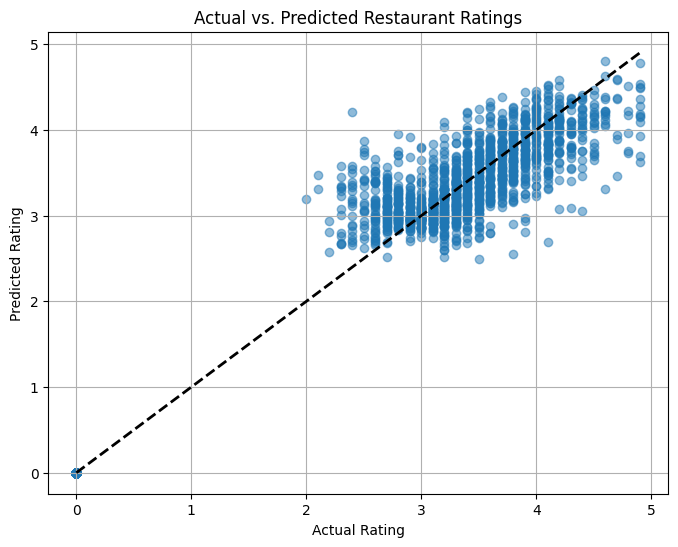

In [63]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Add diagonal line
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs. Predicted Restaurant Ratings')
plt.grid(True)
plt.show()